<a href="https://colab.research.google.com/github/liadekel/analyzing-big-data/blob/master/Lecture_2_Collecting%2C_Analyzing%2C_and_Visualizing_Data_with_Python_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting, Analyzing, and Visualizing Data with Python - Part I
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox - Lecture 2](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

----


## 1. Collecting Data from Websites

Let's write code that easily can get the titles from the [Guido van Rossum blog](http://neopythonic.blogspot.com)

In [0]:
import requests
u = "http://neopythonic.blogspot.com/"
s = requests.get(u).content.decode('utf-8')
s

'<!DOCTYPE html>\n<html dir=\'ltr\' xmlns=\'http://www.w3.org/1999/xhtml\' xmlns:b=\'http://www.google.com/2005/gml/b\' xmlns:data=\'http://www.google.com/2005/gml/data\' xmlns:expr=\'http://www.google.com/2005/gml/expr\'>\n<head>\n<link href=\'https://www.blogger.com/static/v1/widgets/2549344219-widget_css_bundle.css\' rel=\'stylesheet\' type=\'text/css\'/>\n<link href=\'http://google-code-prettify.googlecode.com/svn/trunk/src/prettify.css\' rel=\'stylesheet\' type=\'text/css\'/>\n<script src=\'http://google-code-prettify.googlecode.com/svn/trunk/src/prettify.js\' type=\'text/javascript\'></script>\n<meta content=\'text/html; charset=UTF-8\' http-equiv=\'Content-Type\'/>\n<meta content=\'blogger\' name=\'generator\'/>\n<link href=\'http://neopythonic.blogspot.com/favicon.ico\' rel=\'icon\' type=\'image/x-icon\'/>\n<link href=\'http://neopythonic.blogspot.com/\' rel=\'canonical\'/>\n<link rel="alternate" type="application/atom+xml" title="Neopythonic - Atom" href="http://neopythonic.bl

We have several options to get the titles:
* Using string splits 
* Using regular expressions
* Using HTML parsing package

Let's try to find the titles using each method:

### 1.1 Parsing using String Splits 

In [0]:
html = s
html_parts = html.split("h3 class='post-title entry-title")

def get_title(html):
    h = html.split("</h3>")[0]
    print("After first split:\n %s\n" % h)
    h = h.split("'>")[2]
    print("After second split:\n %s\n" % h)
    return h.replace("</a>", "").strip()


l = [get_title(i) for i in html_parts[1:]]
l
    

After first split:
 ' itemprop='name'>
<a href='http://neopythonic.blogspot.com/2019/03/why-operators-are-useful.html'>Why operators are useful</a>


After second split:
 Why operators are useful</a>


After first split:
 ' itemprop='name'>
<a href='http://neopythonic.blogspot.com/2018/11/what-do-do-with-your-computer-science.html'>What to do with your computer science career</a>


After second split:
 What to do with your computer science career</a>


After first split:
 ' itemprop='name'>
<a href='http://neopythonic.blogspot.com/2016/07/about-spammers-and-comments.html'>About spammers and comments</a>


After second split:
 About spammers and comments</a>


After first split:
 ' itemprop='name'>
<a href='http://neopythonic.blogspot.com/2016/05/union-syntax.html'>Union syntax</a>


After second split:
 Union syntax</a>


After first split:
 ' itemprop='name'>
<a href='http://neopythonic.blogspot.com/2016/05/adding-type-annotations-for-fspath.html'>Adding type annotations for fspath</a

['Why operators are useful',
 'What to do with your computer science career',
 'About spammers and comments',
 'Union syntax',
 'Adding type annotations for fspath',
 'The AnyStr type variable']

### 1.2 Parsing using Regular Expressions

In [0]:
import re
r = re.compile(r"<h3 class='post-title entry-title'.*?>.*?>(.*?)</a><\/h3>")
r.findall(html.replace("\r","").replace("\n",""))

['Why operators are useful',
 'What to do with your computer science career',
 'About spammers and comments',
 'Union syntax',
 'Adding type annotations for fspath',
 'The AnyStr type variable']

### 1.3 Parsing using BeautifulSoup

In [0]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
l = soup.findAll('h3', attrs={'class': 'post-title entry-title'})
l

[<h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2019/03/why-operators-are-useful.html">Why operators are useful</a>
 </h3>, <h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2018/11/what-do-do-with-your-computer-science.html">What to do with your computer science career</a>
 </h3>, <h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2016/07/about-spammers-and-comments.html">About spammers and comments</a>
 </h3>, <h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2016/05/union-syntax.html">Union syntax</a>
 </h3>, <h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2016/05/adding-type-annotations-for-fspath.html">Adding type annotations for fspath</a>
 </h3>, <h3 class="post-title entry-title" itemprop="name">
 <a href="http://neopythonic.blogspot.com/2016/05/the-anystr-t

In [0]:
#Getting the titles
[t.text.strip() for t in l]

['Why operators are useful',
 'What to do with your computer science career',
 'About spammers and comments',
 'Union syntax',
 'Adding type annotations for fspath',
 'The AnyStr type variable']

## 2. Collecting Data using APIs

One straightforward way to collect data is using APIs. In the following example, we will use the [Wikipedia Python package](https://pypi.org/project/wikipedia/),  which warps the [MediaWiki API](https://www.mediawiki.org/wiki/API:Main_page).  First, we install the Wikipedia package. For visualization, we will also install the [Networkx package](https://networkx.github.io)

In [0]:
!pip install wikipedia
!pip install networkx

In [0]:
import wikipedia
w = wikipedia.page("Machine Learning")
w.summary

'Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to perform a specific task without using explicit instructions, relying on patterns and inference instead. It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task. Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop a conventional algorithm for effectively performing the task.\nMachine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a field of study within machine learning, and fo

In [0]:
w.links[:20]

['ACM Computing Classification System',
 'ACM Computing Surveys',
 'ADALINE',
 'AT&T Labs',
 'Action selection',
 'Active learning (machine learning)',
 'Adaptive website',
 'Affective computing',
 'Alan Turing',
 'Algorithm',
 'Algorithm design',
 'Algorithmic bias',
 'Algorithmic efficiency',
 'Amazon Machine Learning',
 'Analysis of algorithms',
 'Angoss',
 'Anomaly detection',
 'Apache Mahout',
 'Apache Spark',
 'Apache SystemML']

Let's build a graph in which each vertex is a category and each link is between categories that reference each other.

In [0]:
verticies = set(w.links[:50])
links = [("Machine Learning", l) for l in verticies]

for v in verticies:
    try:
        w = wikipedia.page(v)
        for v2 in w.links:
            if v2 in verticies:
                links.append((v,v2))    
    except Exception as e:
        print(e)
        

/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


"adeline" may refer to: 
Adeline (given name)
Yves-Marie Adeline
Adeline, Illinois
Adeline Records
Adeline Software International
Ballade pour Adeline
Portrait of Mary Adeline Williams
"Adeline" (song)
Adeleorina
Cyclone Adeline
Pépinières Arboretum Adeline
Adeline (rocket)
Sweet Adeline (disambiguation)


Let's draw the graph:

In [0]:
import networkx as nx
%matplotlib inline 
g = nx.DiGraph()
g.add_edges_from(set(links))
nx.info(g)

'Name: \nType: DiGraph\nNumber of nodes: 51\nNumber of edges: 281\nAverage in degree:   5.5098\nAverage out degree:   5.5098'

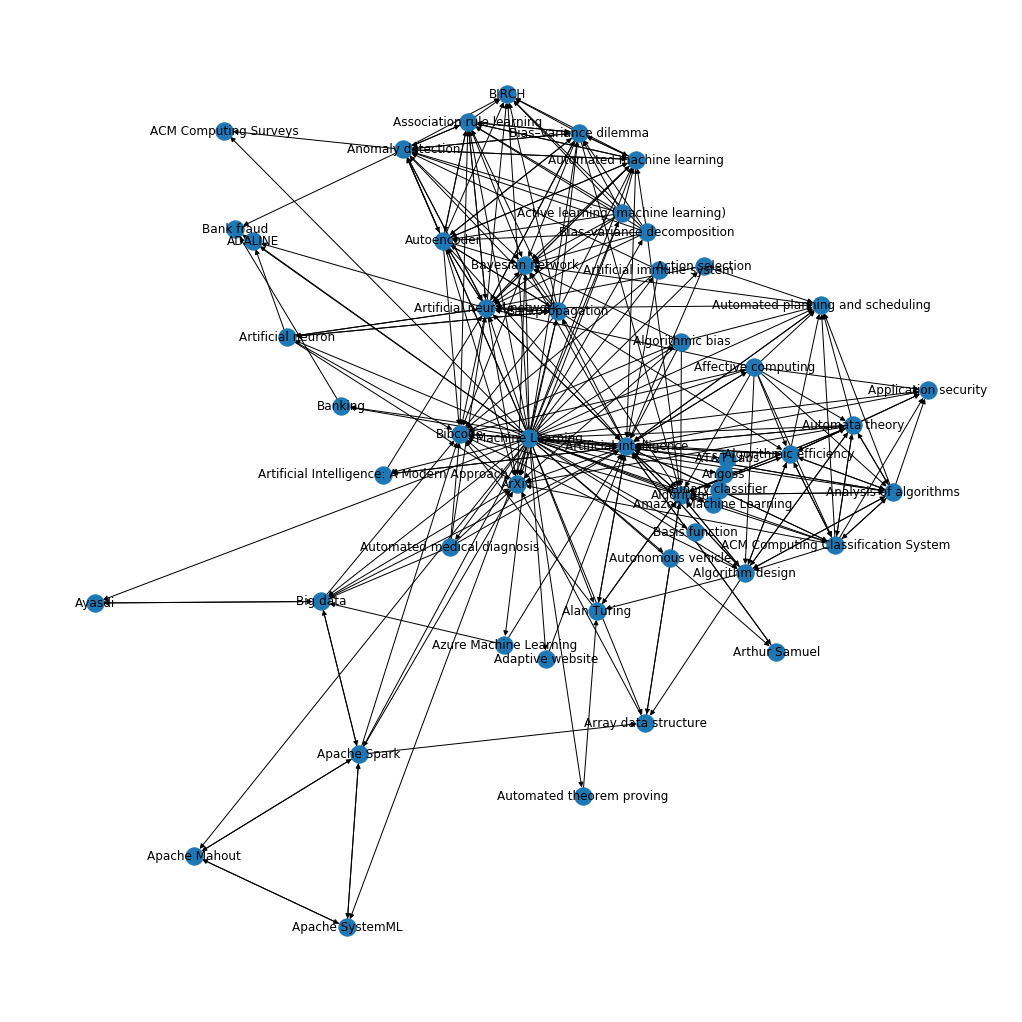

In [0]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(14,14))
nx.draw_kamada_kawai(g, with_labels=True)

We are going to talk more about graphs in the next lectures.

## 3. NumPy, the Basics 

In this section, we are going to give some examples of how to work with NumPy, and the advantages of NumPy's array (_ndarray_) over
Python list object

In [0]:
import numpy as np


In [0]:
??np

In [0]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_distributor_init',
 '_global

As can be seen above NumPy comes with extensive functionality. 
One of the big advantages of NumPy is running fast on large numerical arrays. 
Let's see some examples:

In [0]:
import random
l = list(range(10000000))
random.shuffle(l)

In [0]:
a = np.array(l) # we can also create a Numpy array using np.arange function
                # we can also create a large-scale random array using the following np.random.randint(1,10000000, size=10000000)

print(type(a))
print(a)


<class 'numpy.ndarray'>
[1659700 4004019 9303507 ... 8344299 6568545 2513808]


In [0]:
import sys
print(sys.getsizeof(l))
print(a.nbytes) 

90000112
80000000


We can see that the NumPy *ndarray* object has less memory consumption. Let's see other NumPy advantages:

In [0]:
%timeit sum(l) / float(len(l))
%timeit np.average(a)

1 loop, best of 3: 436 ms per loop
10 loops, best of 3: 20.5 ms per loop


In [0]:
%timeit max(l)
%timeit np.max(a)

1 loop, best of 3: 930 ms per loop
100 loops, best of 3: 11.3 ms per loop


On average using NumPy's average and max functions is considerably faster than using their counterpart list functions.
Additionally, NumPy lets us do numerical operations on a list in a very easy and straightforward way.
Let's add and subtract two lists:

In [0]:
l1 = list(range(1000000))
random.shuffle(l1)
l2 = list(range(1000000))
random.shuffle(l2)
a1 = np.array(l1)
a2 = np.array(l2)

In [0]:
#adding two list (the regular '+' operator on list will append the two lists)
l = []
for i in range(1000000):
    l.append(l1[i] + l2[i])
l[:10]

[1162983,
 1264817,
 793987,
 1102939,
 1317410,
 1351260,
 1642089,
 501249,
 425385,
 1389726]

In [0]:
a = a1 + a2
a[:10]

array([1162983, 1264817,  793987, 1102939, 1317410, 1351260, 1642089,
        501249,  425385, 1389726])

In [0]:
%timeit l = [l1[i] + l2[i] for i in range(1000000)]
%timeit a = a1 + a2

1 loop, best of 3: 348 ms per loop
100 loops, best of 3: 2.51 ms per loop


We can see that adding two arrays with NumPy is much simpler and faster. Using NumPy, we can also do another array arithmetic:

In [0]:
print(a1-a2)
print(a1*a2)
print(a1[:10]/a2[:10])
print(np.concatenate([a1,a2]))

[ 516095 -345321 -412189 ...  421275 -294942 -796127]
[271543852316 370128862612 115128896112 ...   6927525304  23684800360
 144284747274]
[2.59562397 0.57106658 0.3165359  6.92546204 1.45498727 0.68106054
 0.74690505 0.37212708 0.36905203 0.48121629]
[839539 459748 190899 ...  15848 360620 948281]


Let's look at other useful NumPy _ndarray_ object usage:

In [0]:
a1 = np.array([1,2,3,4,5], dtype = np.int32) # array of integer
print("Array type %s" % a1.dtype)
a2 = np.array([1,2,3,4,5], dtype = np.float64) # array of floats
print("Array type %s" % a2.dtype)

Array type int32
Array type float64


In [0]:
a3 = a2.astype('float128')
print("Array type %s" % a3.dtype)

Array type float128


We can also create a 2-dimension array (or _n_-dimensions array):

In [0]:
a4 = np.array([[1,2,3,4],[5,6,7,8]])
a4[1] # access the second row

array([5, 6, 7, 8])

In [0]:
a4[1,1] # access a specific value

6

In [0]:
a4[:1,2:3]

array([[3]])

In [0]:
a4.reshape((1,8))

array([[1, 2, 3, 4, 5, 6, 7, 8]])

In [0]:
a4.reshape((4,2))

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [0]:
import numpy as np
a5 = np.array(['Jhon', "Marry", "William", "BoB"])
a5[a5 == "Marry"]

array(['Marry'], dtype='<U7')

It is important to remember that unlike regular Python lists, **slicing an array won't create copies**. 

In [0]:
l = list(range(10))
a = np.array(l)
sub_l = l[2:-1]
sub_a = a[2:-1]

In [0]:
sub_l

[2, 3, 4, 5, 6, 7, 8]

In [0]:
sub_a

array([2, 3, 4, 5, 6, 7, 8])

In [0]:
sub_l[0] = 100
print(sub_l)
print(l)


[100, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [0]:
sub_a[0] = 100
print(sub_a)
print(a)

[100   3   4   5   6   7   8]
[  0   1 100   3   4   5   6   7   8   9]


In the above example, we can see that changing the subarray's values will also change the original array values. 
NumPy also has a *Not a Number* value (denoted _NaN_). 

In [0]:
a = np.array([1,np.nan,2,4])

In [0]:
np.sum(a)

nan

To calculate various statistics that include *NaN* values, we can use the following functions:

In [0]:
print("Sum = %s" % np.nansum(a))
print("Max = %s" % np.nanmax(a))
print("STD = %s" % np.nanstd(a))

Sum = 7.0
Max = 4.0
STD = 1.247219128924647


Or, we can remove the *NaN* values from the array:

In [0]:
a = a[np.logical_not(np.isnan(a))] 
print("Sum = %s" % np.sum(a))
print("Max = %s" % np.max(a))
print("STD = %s" % np.std(a))

Sum = 7.0
Max = 4.0
STD = 1.247219128924647


## 4. Working with Pandas

Let's start with an example. Similar to our last lecture work with _DBMS_ and _SQL_, we want to explore the _Netflix Shows Dataset_ but this time using _Pandas_. We will start by downloading the dataset from Kaggle (see first lecture for details):

In [0]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"<Insert Your Kaggle User Name>","key":"<Insert Your Kaggle API key>"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/netflix

# download the dataset from Kaggle and unzip it
!kaggle datasets download chasewillden/netflix-shows -p ./datasets/netflix/
!chdir ./datasets/netflix
!unzip ./datasets/netflix/*.zip  -d ./datasets/netflix
!ls ./datasets/netflix

  0% 0.00/10.6k [00:00<?, ?B/s]
100% 10.6k/10.6k [00:00<00:00, 9.05MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/netflix/netflix-shows.zip
  inflating: ./datasets/netflix/Netflix Shows.csv  
'Netflix Shows.csv'   netflix-shows.zip


Now, let's load the shows data into a DataFrame Object:

In [0]:
import pandas as pd
import numpy as np


First, we load the Netflix Shows csv to a _Pandas DataFrame object_:

In [0]:
df = pd.read_csv('./datasets/netflix/Netflix Shows.csv', encoding='cp437' )
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


Let's take a closer look on the _user rating score_ column:

In [0]:
c = df['user rating score']
c

0      82.0
1       NaN
2      98.0
3      98.0
4      94.0
       ... 
995    97.0
996     NaN
997     NaN
998     NaN
999    80.0
Name: user rating score, Length: 1000, dtype: float64

In [0]:
print("Min = %s" % np.nanmin(c))
print("Max = %s" % np.nanmax(c))
print("Median = %s" % np.nanmedian(c))
print("Average = %s" % np.nanmean(c))

Min = 55.0
Max = 99.0
Median = 88.0
Average = 84.09421487603306


We can create a nice visualization of the user rating score column using the Seaborn package:

In [0]:
!pip install seaborn

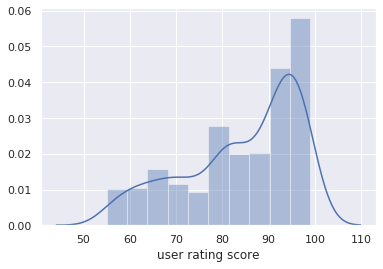

In [0]:
import seaborn as sns 
c = c[np.logical_not(np.isnan(c))] # removes NaN
sns.set(style="darkgrid")
sns.distplot(c)

We can also visualize other interesting statistics, such as the rating histogram for each decade in just few lines of code:

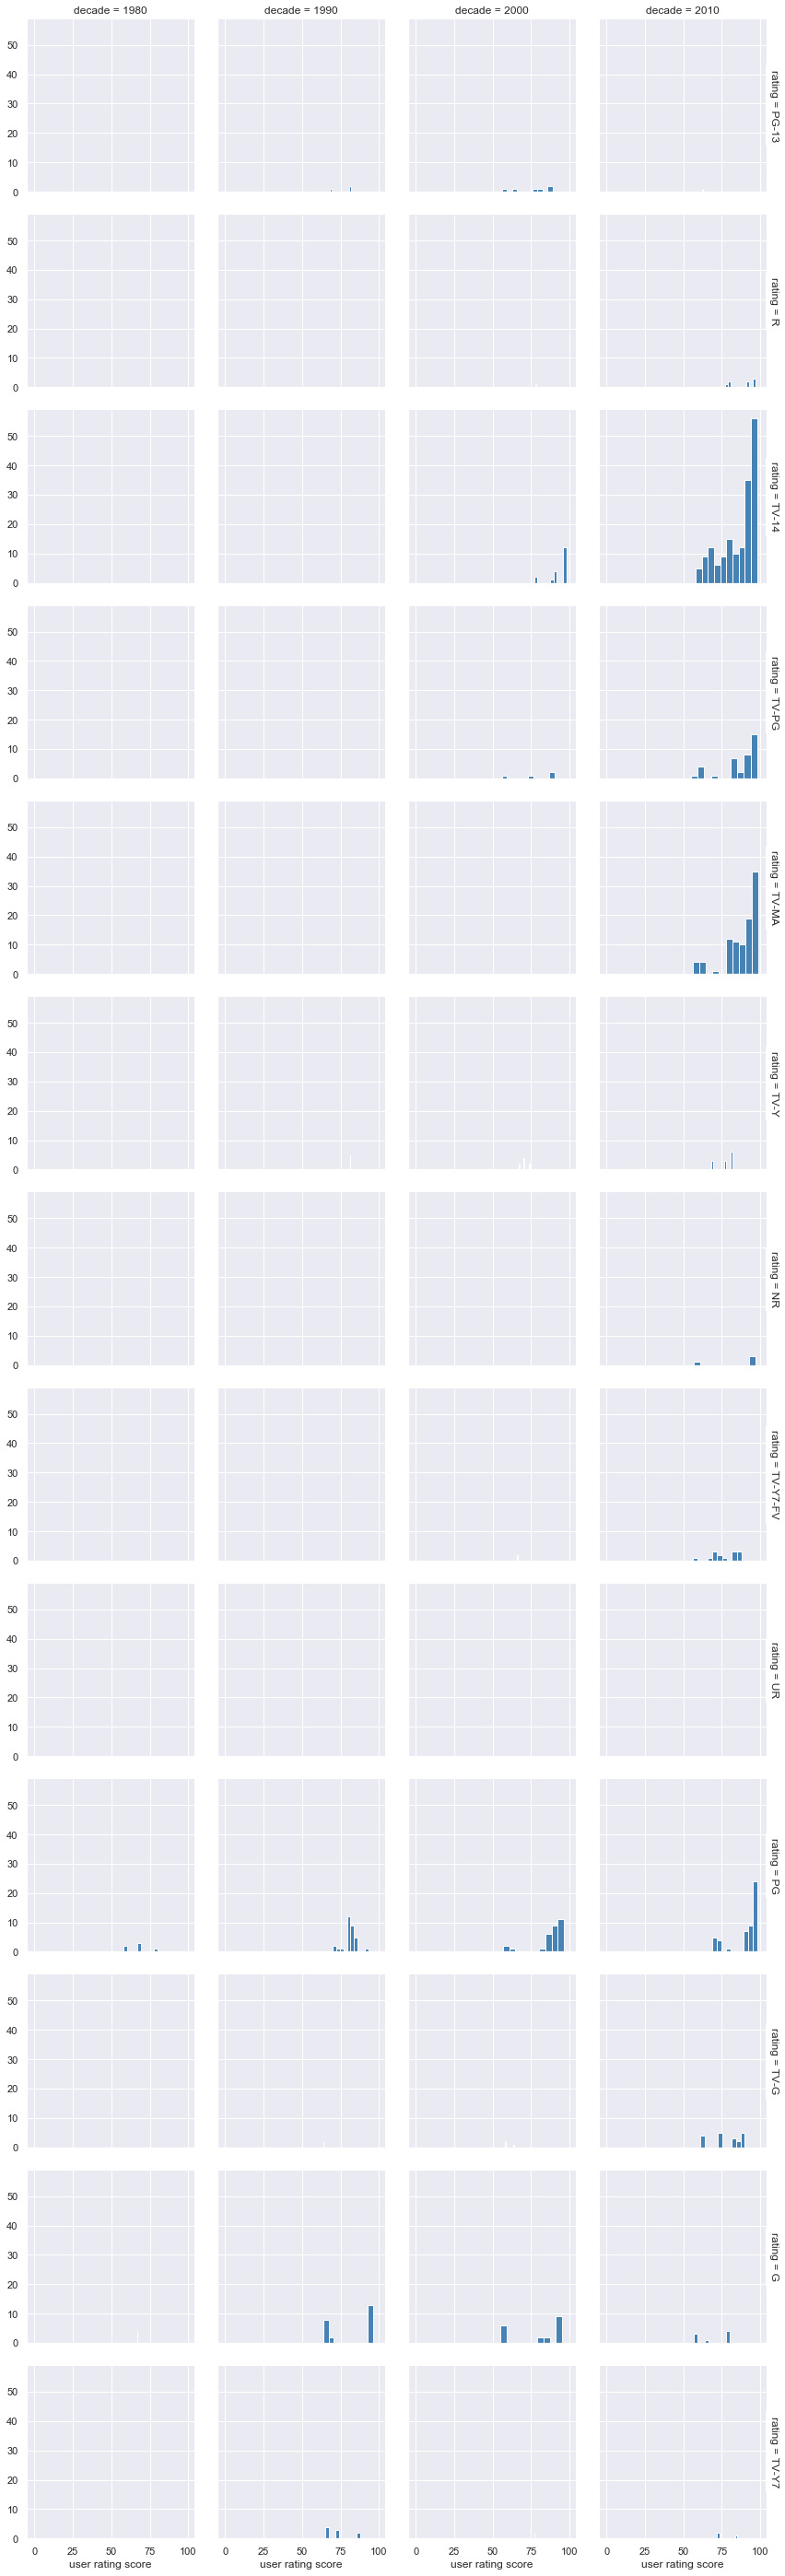

In [0]:
import matplotlib.pyplot as plt
df['decade'] = df['release year'] - df['release year'] % 10 # add a decade column
df = df[df['decade'] >= 1980] # select only rows with decade larger or equal 1980
g = sns.FacetGrid(df, row="rating", col="decade", margin_titles=True)
g.map(plt.hist, "user rating score", color="steelblue")

### 4.1 Pandas Objects

Pandas have several objects to manipulate date. Let's take a closer look at them: We start with the Series object. The _Series object_ is a generalized NumPy array, which has both data and index values. We can think of the Series object as a more efficient version of Python's _dict object_:

In [0]:
s = pd.Series([2,1,2,3,6,7])
s

0    2
1    1
2    2
3    3
4    6
5    7
dtype: int64

In [0]:
print(s.values)
print(type(s.values))

[2 1 2 3 6 7]
<class 'numpy.ndarray'>


In [0]:
s.index

RangeIndex(start=0, stop=6, step=1)

We can use strings to be indices:

In [0]:
s = pd.Series([2,1,2,3,6,7], index=['a','b','c','de','e','f'])
s

a     2
b     1
c     2
de    3
e     6
f     7
dtype: int64

In [0]:
s['f']

7

In [0]:
s = pd.Series({'A':1, 'B':2, 'C':4})
s

A    1
B    2
C    4
dtype: int64

The second object we going to look at is the *DataFrame object*. We can think on the DataFrame object as a table with both columns and rows indices (similar to an Excel sheet :-).

In [0]:
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


In [0]:
print("DataFrame columns %s" % df.columns)
print("DataFrame Index %s" % df.index)

DataFrame columns Index(['title', 'rating', 'ratingLevel', 'ratingDescription', 'release year',
       'user rating score', 'user rating size'],
      dtype='object')
DataFrame Index RangeIndex(start=0, stop=1000, step=1)


We can change the index values to the following:

In [0]:
df.index = df["title"]

In [0]:
type(df["title"])

pandas.core.series.Series

In [0]:
df['rating']

title
White Chicks               PG-13
Lucky Number Slevin            R
Grey's Anatomy             TV-14
Prison Break               TV-14
How I Met Your Mother      TV-PG
                           ...  
The BFG                       PG
The Secret Life of Pets       PG
Precious Puppies            TV-G
Beary Tales                 TV-G
Growing Up Wild                G
Name: rating, Length: 1000, dtype: object

In [0]:
df['rating']['Sherlock']

Sherlock    TV-14
Sherlock    TV-14
Sherlock    TV-14
Name: rating, dtype: object

We can create new DataFrame objects by selecting columns and rows:

In [0]:
#selecting specific columns
df2 = df[['title','rating', 'release year']]
df2

,title,rating,release year
title,,,
White Chicks,White Chicks,PG-13,2004
Lucky Number Slevin,Lucky Number Slevin,R,2006
Grey's Anatomy,Grey's Anatomy,TV-14,2016
Prison Break,Prison Break,TV-14,2008
How I Met Your Mother,How I Met Your Mother,TV-PG,2014
...,...,...,...
The BFG,The BFG,PG,2016
The Secret Life of Pets,The Secret Life of Pets,PG,2016
Precious Puppies,Precious Puppies,TV-G,2003


In [0]:
#selecting 10 top rows
df.iloc[:10]

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
title,,,,,,,
White Chicks,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
Lucky Number Slevin,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
Grey's Anatomy,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
Prison Break,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
How I Met Your Mother,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
Supernatural,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
Breaking Bad,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80
The Vampire Diaries,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80
The Walking Dead,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110,2015,98.0,80


In [0]:
#selecting any other rows 
df.iloc[::2]

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
title,,,,,,,
White Chicks,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
Grey's Anatomy,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
How I Met Your Mother,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
Breaking Bad,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80
The Walking Dead,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110,2015,98.0,80
...,...,...,...,...,...,...,...
My Animal Friends,My Animal Friends,TV-Y,Suitable for all ages.,10,2013,NaN,82
Alpha and Omega: Dino Digs,Alpha and Omega: Dino Digs,TV-G,Suitable for all ages.,35,2016,NaN,82
Pup Star,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,NaN,82


In [0]:
df2 = df[['title','rating', 'release year']]

There are duplicate rows let's remove them:

In [0]:
print("DataFrame's shape (%s,%s)" %df2.shape)
df2 = df2.drop_duplicates()
print("DataFrame's shape (%s,%s) (after remove)" %df2.shape)


DataFrame's shape (1000,3)
DataFrame's shape (500,3) (after remove)


We can transpose between rows and columns:

In [0]:
df2.T

title,White Chicks,Lucky Number Slevin,Grey's Anatomy,Prison Break,How I Met Your Mother,Supernatural,Breaking Bad,The Vampire Diaries,The Walking Dead,Pretty Little Liars,Once Upon a Time,Sherlock,Death Note,Naruto,The Hunter,Lottie Dottie Chicken,Arrow,Black Mirror,The Originals,The 100,Masha and the Bear,"╠╥ Pai, ╠╥ - Look at This",Nymphomaniac: Volume 1,Hunter X Hunter (2011),Marvel's Luke Cage,Marvel's Iron Fist,Narcos,The Flash,The Seven Deadly Sins,Scream,The Do-Over,Opera╠ñ╠╡es Especiais,3%,Trollhunters,Fearless,Hyena Road,Santa Clarita Diet,"Sex, Love and Therapy",White Girl,Girlboss,...,Puffin Rock,The Mr. Peabody and Sherman Show,Zoobabu,Gon,Sid the Science Kid: The Movie,LEGO Jurassic World: The Indominus Escape,Harry and the Hendersons,Cats & Dogs,Atlantis: The Lost Empire,Tarzan & Jane,Atlantis: Milo's Return,Batched,Winnie the Pooh: Springtime with Roo,Pooh's Heffalump Movie,Kronk's New Groove,Corpse Bride,Disney Animation Collection: Vol. 2: Three Little Pigs,Underdogs,Yellowbird,Mr. Magoo,Air Bud: World Pup,Baby's Day Out,Blank Check,Heavyweights,Inspector Gadget 2,Air Bud: Spikes Back,D2: The Mighty Ducks,"Honey, I Shrunk the Kids",Air Buddies,Dr. Dolittle: Tail to the Chief,Flicka 2,H2O: Just Add Water,Dolphin Tale,Step Dogs,Mia and Me,Russell Madness,Wiener Dog Internationals,Pup Star,Precious Puppies,Beary Tales
title,White Chicks,Lucky Number Slevin,Grey's Anatomy,Prison Break,How I Met Your Mother,Supernatural,Breaking Bad,The Vampire Diaries,The Walking Dead,Pretty Little Liars,Once Upon a Time,Sherlock,Death Note,Naruto,The Hunter,Lottie Dottie Chicken,Arrow,Black Mirror,The Originals,The 100,Masha and the Bear,"╠╥ Pai, ╠╥ - Look at This",Nymphomaniac: Volume 1,Hunter X Hunter (2011),Marvel's Luke Cage,Marvel's Iron Fist,Narcos,The Flash,The Seven Deadly Sins,Scream,The Do-Over,Opera╠ñ╠╡es Especiais,3%,Trollhunters,Fearless,Hyena Road,Santa Clarita Diet,"Sex, Love and Therapy",White Girl,Girlboss,...,Puffin Rock,The Mr. Peabody and Sherman Show,Zoobabu,Gon,Sid the Science Kid: The Movie,LEGO Jurassic World: The Indominus Escape,Harry and the Hendersons,Cats & Dogs,Atlantis: The Lost Empire,Tarzan & Jane,Atlantis: Milo's Return,Batched,Winnie the Pooh: Springtime with Roo,Pooh's Heffalump Movie,Kronk's New Groove,Corpse Bride,Disney Animation Collection: Vol. 2: Three Lit...,Underdogs,Yellowbird,Mr. Magoo,Air Bud: World Pup,Baby's Day Out,Blank Check,Heavyweights,Inspector Gadget 2,Air Bud: Spikes Back,D2: The Mighty Ducks,"Honey, I Shrunk the Kids",Air Buddies,Dr. Dolittle: Tail to the Chief,Flicka 2,H2O: Just Add Water,Dolphin Tale,Step Dogs,Mia and Me,Russell Madness,Wiener Dog Internationals,Pup Star,Precious Puppies,Beary Tales
rating,PG-13,R,TV-14,TV-14,TV-PG,TV-14,TV-MA,TV-14,TV-MA,TV-14,TV-PG,TV-14,TV-14,TV-PG,R,TV-Y,TV-14,TV-MA,TV-14,NR,TV-Y,TV-MA,NR,NR,TV-MA,TV-MA,TV-MA,TV-PG,TV-14,TV-14,TV-MA,TV-MA,TV-MA,TV-Y7-FV,TV-14,R,TV-MA,NR,UR,TV-MA,...,TV-Y,TV-Y7,TV-Y,TV-G,TV-Y,TV-Y7,PG,PG,PG,G,G,G,G,G,G,PG,TV-G,PG,PG,PG,G,PG,PG,PG,G,G,PG,PG,PG,PG,PG,TV-PG,PG,TV-PG,TV-Y,PG,G,G,TV-G,TV-G
release year,2004,2006,2016,2008,2014,2016,2013,2017,2015,2016,2016,2016,2006,2008,2011,2009,2015,2016,2016,2016,2013,2007,2013,2013,2016,2017,2016,2016,2016,2016,2016,2015,2016,2016,2016,2015,2017,2014,2016,2017,...,2016,2017,2010,2013,2012,2016,1987,2001,2001,2002,2003,2000,2004,2005,2005,2005,2009,2013,2014,1997,2000,1994,1994,1995,2003,2003,1994,1989,2006,2008,2010,2009,2011,2013,2015,2015,2015,2016,2003,2013


Let's select only movies that were released after 2016:

In [0]:
df2 = df[df['release year'] > 2016]
df2.shape  # we can get the number of columns and indexes

(100, 7)

We can add a decade column:

In [0]:
df['decade'] = df['release year'].apply(lambda y: y - y%10)
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,decade
title,,,,,,,,
White Chicks,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,2000
Lucky Number Slevin,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82,2000
Grey's Anatomy,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,2010
Prison Break,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,2000
How I Met Your Mother,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,2010
...,...,...,...,...,...,...,...,...
The BFG,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80,2010
The Secret Life of Pets,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81,2010
Precious Puppies,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82,2000


### 4.2 Using Groupby 

Similar to SQL, Pandas also has a groupby functionality.
Namely, we can use _groupby_ function to create a _DataFrameGroupBy_
object:

In [0]:
df3 = df[['user rating score','decade', "release year"]]
df3 = df3.dropna()
g = df3.groupby("decade")
g

We can access each group directly using the *get_group* function:

In [0]:
g.get_group(2010)

,user rating score,decade,release year
title,,,
Grey's Anatomy,98.0,2010,2016
How I Met Your Mother,94.0,2010,2014
Supernatural,95.0,2010,2016
Breaking Bad,97.0,2010,2013
The Vampire Diaries,91.0,2010,2017
...,...,...,...
Growing Up Wild,80.0,2010,2016
Paddington,70.0,2010,2014
Dawn of the Croods,72.0,2010,2017


Or iterate over the groups:

In [0]:
d = {}
for y, year_df in g:
    d[y] = year_df
d[2010]

,user rating score,decade,release year
title,,,
Grey's Anatomy,98.0,2010,2016
How I Met Your Mother,94.0,2010,2014
Supernatural,95.0,2010,2016
Breaking Bad,97.0,2010,2013
The Vampire Diaries,91.0,2010,2017
...,...,...,...
Growing Up Wild,80.0,2010,2016
Paddington,70.0,2010,2014
Dawn of the Croods,72.0,2010,2017


In [0]:
g.max()

,user rating score,release year
decade,,
1940,61.0,1940
1970,86.0,1978
1980,80.0,1989
1990,96.0,1999
2000,98.0,2009
2010,99.0,2017


In [0]:
g.describe()

user rating score                        ... release year                 
                   count       mean        std  ...          50%      75%     max
decade                                          ...                              
1940                 3.0  61.000000   0.000000  ...       1940.0  1940.00  1940.0
1970                 2.0  86.000000   0.000000  ...       1978.0  1978.00  1978.0
1980                10.0  66.800000   6.088240  ...       1986.0  1986.75  1989.0
1990                73.0  79.808219   9.974492  ...       1997.0  1998.00  1999.0
2000                94.0  83.010638  13.907911  ...       2006.0  2007.00  2009.0
2010               423.0  85.638298  11.873709  ...       2016.0  2016.00  2017.0

[6 rows x 16 columns]

decade
1940    AxesSubplot(0.125,0.125;0.775x0.755)
1970    AxesSubplot(0.125,0.125;0.775x0.755)
1980    AxesSubplot(0.125,0.125;0.775x0.755)
1990    AxesSubplot(0.125,0.125;0.775x0.755)
2000    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

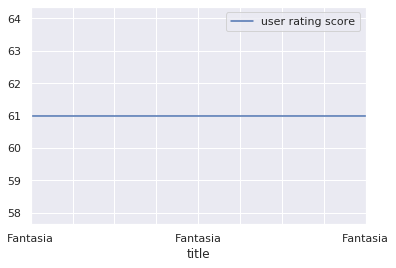

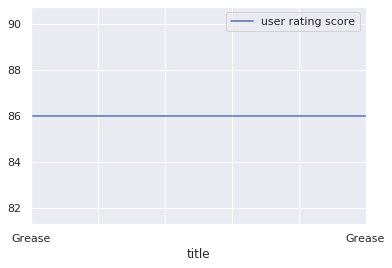

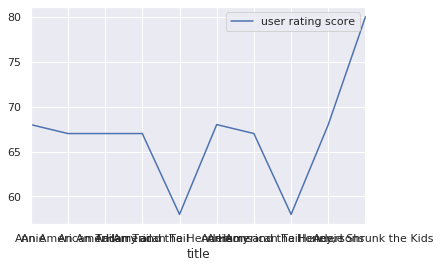

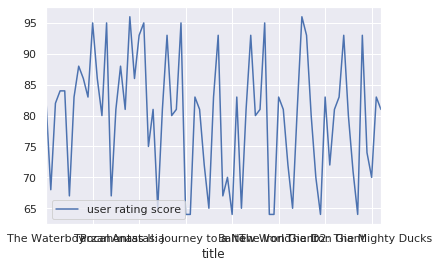

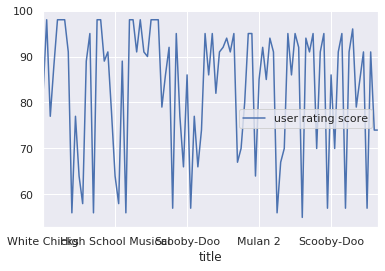

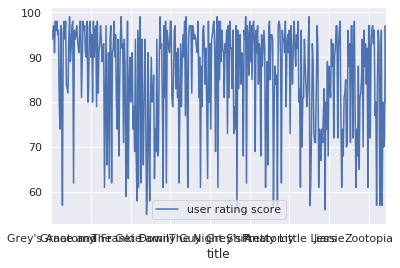

In [0]:
g.plot( y='user rating score')

In [0]:
pd.__version__

'0.25.3'

## 5. Real-World Examples

## 5.1 Emmy Awards Dataset

Let's downlpad at the [Prime Time Emmy Awards Dataset](https://www.kaggle.com/pmagda/primetime-emmy-awards) to try to discover some interesting insights:

In [0]:
# Creating a dataset directory
!cd /content
!mkdir ./datasets/emmy
!cd ./datasets/emmy

# download the dataset from Kaggle and unzip it
!kaggle datasets download pmagda/primetime-emmy-awards  -p ./datasets/emmy
!unzip ./datasets/emmy/*.zip  -d ./datasets/emmy
!ls ./datasets/emmy

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 33.4MB/s]
Archive:  ./datasets/emmy/primetime-emmy-awards.zip
  inflating: ./datasets/emmy/emmy-awards-1949-2017.csv  
emmy-awards-1949-2017.csv  primetime-emmy-awards.zip


In [0]:
import pandas as pd
%matplotlib inline 
df = pd.read_csv("./datasets/emmy/emmy-awards-1949-2017.csv")
df

,year,category,winner,nominee,detail
0,1949,Technical Award,1,Charles Mesak/Don Lee TV for Phasefader - In R...,NaN
1,1949,Best Film Made For Television,0,Christopher Columbus,CBS
2,1949,Best Film Made For Television,0,Hollywood Brevities,CBS
3,1949,Best Film Made For Television,0,It Could Happen To You,CBS
4,1949,Best Film Made For Television,0,Tell Tale Heart,CBS
...,...,...,...,...,...
19234,2017,"Outstanding Production Design For Variety, Non...",0,"Bill Nye Saves The World - ""Earth Is A Hot Mess""",Netflix
19235,2017,"Outstanding Production Design For Variety, Non...",0,"Drunk History - ""Hamilton""",Comedy Central
19236,2017,"Outstanding Production Design For Variety, Non...",0,"Portlandia - ""Fred's Cell Phone Company""",IFC
19237,2017,"Outstanding Production Design For Variety, Non...",1,"Saturday Night Live - ""Host: Alec Baldwin""",NBC


Let's see how many Emmy Award winner we have over the years:

In [0]:
g = df[['year', 'winner']].groupby('year')
g.get_group(1952)
type(g)
g

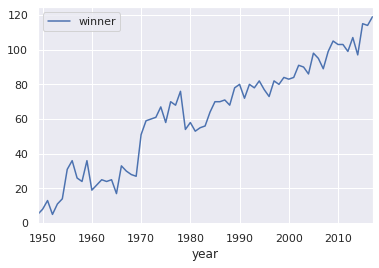

In [0]:
g.sum().plot(y="winner")

As we can see the number of Emmy winners each year increased over the years. Let's calculate how many winners in each category we had over the years:

In [0]:
print("Number of categories %s" % df['category'].unique().shape[0])

Number of categories 1043


Wow, over the years there were over 1000 unique categories. Let's see what are the most common categories:

In [0]:
g = df[['category', 'winner']].groupby('category')
g.sum().sort_values(['winner'], ascending=0)

,winner
category,
Outstanding Individual Achievement,75
Outstanding Individual Achievement In Animation,67
Outstanding Comedy Series,50
Outstanding Lead Actress In A Drama Series,42
Outstanding Lead Actor In A Comedy Series,42
...,...
Outstanding Single Performance By A Supporting Actor In Comedy Or Drama Special,0
Best Contribution To Daytime Programming,0
Outstanding Achievement In Graphic Design,0


We can see that for some categories, we have data only on the nominees, but not on the winners. Let's check who is the most awarded individual:

In [0]:
winners_df = df[df['winner'] != 0]
winners_df

,year,category,winner,nominee,detail
0,1949,Technical Award,1,Charles Mesak/Don Lee TV for Phasefader - In R...,NaN
5,1949,Best Film Made For Television,1,The Necklace (Your Show Time Series),CBS
11,1949,Most Outstanding Television Personality,1,Shirley Dinsdale,NaN
18,1949,Most Popular Television Program,1,Pantomime Quiz Time,KTLA
22,1949,Special Award,1,Louis McManus For His Original Design of the Emmy,NaN
...,...,...,...,...,...
19218,2017,Outstanding Innovation In Interactive Programming,1,PEARL,NaN
19220,2017,Outstanding Music Supervision,1,"Big Little Lies - ""You Get What You Need""",HBO
19228,2017,Outstanding Original Interactive Program,1,The People's House - Inside The White House Wi...,Samsung / Oculus
19231,2017,Outstanding Picture Editing For Variety Progra...,1,"Last Week Tonight With John Oliver - ""F*ck 201...",HBO


In [0]:
winners_df[['nominee', 'winner']].groupby('nominee').count().sort_values(['winner'], ascending=0)

,winner
nominee,
Frasier,24
The Daily Show With Jon Stewart,19
ER,18
The Carol Burnett Show,17
STAR TREK: THE NEXT GENERATION,17
...,...
Invasion America,1
Invader Zim,1
Into The Storm,1


So, we have some clues on what is in the data, and who are the all-time Emmy winners. However, we didn't clean the data before analyzing it. This can result in inaccurate results. For example, lets look at nominee names that include the word 'MTV', and we will get the following:

In [0]:
df[df['nominee'].apply(lambda n: "MTV" in str(n))] # Another option is to search for MTV in the 'detail' column

,year,category,winner,nominee,detail
5856,1985,Outstanding Art Direction For A Variety Or Mus...,0,1st Annual MTV Video Music Awards,SYN
8213,1992,Outstanding Individual Achievement In Graphic ...,1,MTV LIQUID TV,MTV
8426,1993,Outstanding Technical Direction/Camera/Video F...,0,MTV UNPLUGGED,MTV
8451,1993,"Outstanding Variety, Music Or Comedy Series",0,MTV UNPLUGGED,MTV
8525,1993,Outstanding Individual Achievement In Graphic ...,0,MTV VIDEO MUSIC AWARDS,MTV
8648,1993,Outstanding Individual Achievement In Sound Mi...,0,MTV UNPLUGGED,MTV
8812,1994,"Outstanding Variety, Music Or Comedy Series",0,MTV UNPLUGGED,MTV
9155,1995,"Outstanding Variety, Music Or Comedy Series",0,MTV UNPLUGGED,MTV
9433,1996,Outstanding Choreography,0,1995 MTV Video Music Awards,MTV
10786,1999,Outstanding Technical Direction/Camera/Video F...,0,1998 MTV Video Music Awards,MTV


We can observe that some of the nominees, such as 2010 MTV Video Music Awards, include a specific year. Therefore, in the aggregation process we won't accurately count all MTV Video Music Awards nominees.
This is a great example of why it is very important to get familiar with and clean the data before analyzing it.


**Further Reading:**
* [Primetime Emmy Awards - EDA](https://www.kaggle.com/ramirobentes/eda-primetime-emmy-awards-shinyapp) by Ramiro Bentes

## 5.2 Lord of the Rings Dataset

In this example, we will use the [Lord of the Rings Datasets](https://www.kaggle.com/paultimothymooney/lord-of-the-rings-data),
which include character data, as well as script data. First, let's download the dataset:

In [0]:
# Creating a dataset directory
!cd /content
!mkdir ./datasets/ltor
!cd ./datasets/ltor

# download the dataset from Kaggle and unzip it
!kaggle datasets download paultimothymooney/lord-of-the-rings-data  -p ./datasets/ltor
!unzip ./datasets/ltor/*.zip  -d ./datasets/ltor
!ls ./datasets/ltor

  0% 0.00/88.0k [00:00<?, ?B/s]
100% 88.0k/88.0k [00:00<00:00, 32.6MB/s]
Archive:  ./datasets/ltor/lord-of-the-rings-data.zip
  inflating: ./datasets/ltor/lotr_characters.csv  
  inflating: ./datasets/ltor/lotr_scripts.csv  
lord-of-the-rings-data.zip  lotr_characters.csv  lotr_scripts.csv


In [0]:
import re 
import numpy as np
import pandas as pd
import networkx as nx

df = pd.read_csv("./datasets/ltor/lotr_characters.csv")
df = df.fillna('')
df

,birth,death,gender,hair,height,name,race,realm,spouse
0,,,Female,,,Adanel,Men,,Belemir
1,TA 2978,"February 26 ,3019",Male,Dark (book) Light brown (movie),,Boromir,Men,,
2,,"March ,3019",Male,,,Lagduf,Orcs,,
3,TA 280,TA 515,Male,,,Tarcil,Men,Arnor,Unnamed wife
4,,,Male,,,Fire-drake of Gondolin,Dragon,,
...,...,...,...,...,...,...,...,...,...
906,"Mid ,First Age",FA 495,Female,,,Aerin,Men,,Brodda
907,,,,,,Aerandir,,,
908,"YT during the ,Noontide of Valinor",FA 455,Male,Golden,,Aegnor,Elves,,"Loved ,Andreth but remained unmarried"
909,TA 2917,TA 3010,Male,,,Adrahil II,Men,,Unnamed wife


Let's count the number of characters of each race and gender:

In [0]:
g = df.groupby(['race', 'gender'])
#g.size()# create a Series 
g.size().to_frame (name='counts').sort_values('counts', ascending=0)

,,counts
race,gender,
Men,Male,334
,,137
Hobbits,Male,89
Elves,Male,76
Men,Female,51
...,...,...
Dragon,Male,1
Black Uruk,Male,1
Hobbits,male,1


Let's draw the spouse network. First, let's clean out the data and create a DataFrame object in which we have all the couples' data organized:


In [0]:
import re
def normailze_spouse(s):
    if s in {'','Unnamed wife', 'None' }:
        return None
    if "Loved" not in s:
        return s
    
    r = re.compile("Loved ,(\w+)")
    l = r.findall(s)
    if len(l) > 0:
        return l[0]
df['norm_spouse'] = df['spouse'].apply(lambda s: normailze_spouse(s))
    
links_df = df[['name', 'norm_spouse', 'race', 'gender']]
links_df = links_df.dropna()
links_df


,name,norm_spouse,race,gender
0,Adanel,Belemir,Men,Female
7,Angrod,Eldalótë,Elves,Male
10,Ar-Pharazôn,Tar-Míriel,Men,Male
12,Ar-Gimilzôr,Inzilbêth,Men,Male
21,Tarannon Falastur,Berúthiel,Men,Male
...,...,...,...,...
897,Ailinel,Orchaldor,Men,Female
898,Almarian,Tar-Meneldur,Men,Female
899,Algund,None known,Men,Male
906,Aerin,Brodda,Men,Female


In [0]:
links_df2 = pd.merge(links_df, links_df, left_on="name", right_on="norm_spouse")
links_df2


,name_x,norm_spouse_x,race_x,gender_x,name_y,norm_spouse_y,race_y,gender_y
0,Adanel,Belemir,Men,Female,Belemir,Adanel,Men,Male
1,Angrod,Eldalótë,Elves,Male,Eldalótë,Angrod,Elves,Female
2,Ar-Pharazôn,Tar-Míriel,Men,Male,Tar-Míriel,Ar-Pharazôn,Men,Female
3,Ar-Gimilzôr,Inzilbêth,Men,Male,Inzilbêth,Ar-Gimilzôr,Men,Female
4,Tarannon Falastur,Berúthiel,Men,Male,Berúthiel,Tarannon Falastur,Men,Female
...,...,...,...,...,...,...,...,...
122,Amroth,Nimrodel,Elves,Male,Nimrodel,Amroth,Elves,Female
123,Amarië,Finrod,Elves,Female,Finrod,Amarië,Elves,Male
124,Ailinel,Orchaldor,Men,Female,Orchaldor,Ailinel,Men,Male
125,Almarian,Tar-Meneldur,Men,Female,Tar-Meneldur,Almarian,Men,Male


In [0]:
links_df2 = links_df2[["name_x","race_x", "gender_x", "name_y", "race_y", "gender_y"]]
links_df2

,name_x,race_x,gender_x,name_y,race_y,gender_y
0,Adanel,Men,Female,Belemir,Men,Male
1,Angrod,Elves,Male,Eldalótë,Elves,Female
2,Ar-Pharazôn,Men,Male,Tar-Míriel,Men,Female
3,Ar-Gimilzôr,Men,Male,Inzilbêth,Men,Female
4,Tarannon Falastur,Men,Male,Berúthiel,Men,Female
...,...,...,...,...,...,...
122,Amroth,Elves,Male,Nimrodel,Elves,Female
123,Amarië,Elves,Female,Finrod,Elves,Male
124,Ailinel,Men,Female,Orchaldor,Men,Male
125,Almarian,Men,Female,Tar-Meneldur,Men,Male


Next, let create a Networkx graph object

In [0]:
g = nx.Graph()

for i, r in links_df2.iterrows():
    g.add_node(r['name_x'],race=r["race_x"], gender=r["gender_x"])
    g.add_node(r['name_y'],race=r["race_y"], gender=r["gender_y"])
    edges_list = [(r['name_x'], r['name_y']) for i, r in links_df2.iterrows()]

g.add_edges_from(edges_list)


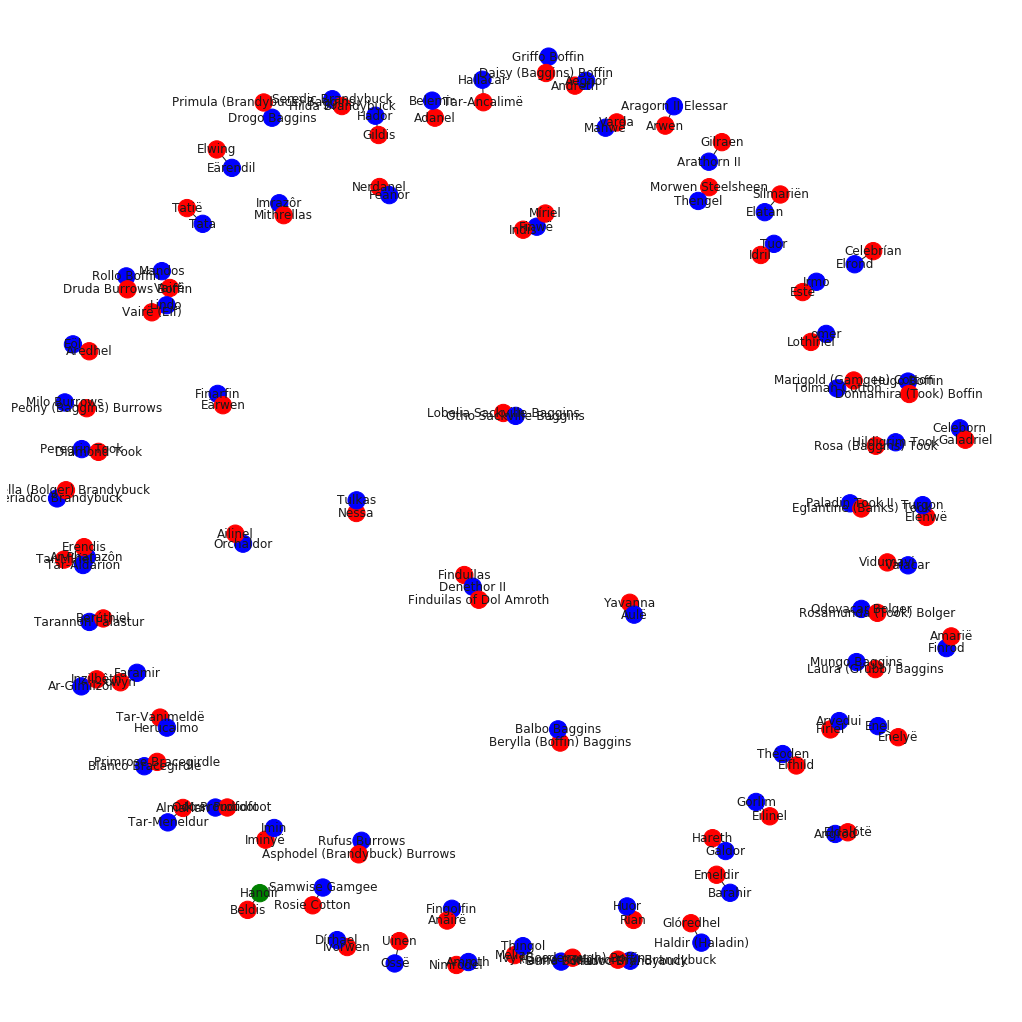

In [0]:
import matplotlib.pyplot as plt

node_colors = []
# add node color by gender
for node in g.nodes(data=True):

    if node[1]['gender'] == "Male":
        node_colors.append('blue')
    elif node[1]['gender'] == "Female":
        node_colors.append('red')
    else:
        node_colors.append('green')


plt.figure(3,figsize=(14,14))
nx.draw_spring(g, with_labels=True, node_color=node_colors)

We can also draw the vertices to have different shapes according to each character race. 
We will show how todo this later in the course.

## Further Reading

There are some great tutorials on interesting real world datasets. Here are some examples:
* [Chapter 4. NumPy Basics: Arrays and Vectorized Computation](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html), _Python for Data Analysis_, Wes McKinney
* [Chapter 2 Introduction to Numpy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html), _Python Data Science Handbook_, Jake VanderPlas
* [Chapter 3 Data Manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html), _Python Data Science Handbook_, Jake VanderPlas
* [How to Index, Slice and Reshape NumPy Arrays for Machine Learning](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/)
* [Primetime Emmy Awards - EDA](https://www.kaggle.com/ramirobentes/eda-primetime-emmy-awards-shinyapp), Ramiro Bentes
* [Let's discover more about the Olympic Games!](https://www.kaggle.com/marcogdepinto/let-s-discover-more-about-the-olympic-games), Marco Giuseppe de Pinto
* [Python Data Wrangling: Preparing for the Future](https://www.youtube.com/watch?v=BDhjOUPQLUc), Wes McKinney (YouTube Video)


